In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [2]:
test_phantom = phantom.Phantom(source_path = None,
            voxel_dims = (0.5e-3,0.5e-3,0.5e-3),
            matrix_dims = (150,150,100),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=5.3, scale=0.00001, label=1)
myocardium = tissue.Tissue(name='myocardium', c=1561.3, rho=1081, sigma=50, scale=0.0001, label=2)
fat = tissue.Tissue(name='fat', c=1450, rho=920, sigma=0, scale=1, label=3)

pos = 0.02

# test_phantom.add_tissue_sphere((pos,-pos,0), 2, blood)
# test_phantom.add_tissue_sphere((pos,0,0), 4, blood)
# test_phantom.add_tissue_sphere((pos,pos,0), 8, blood)

# test_phantom.add_tissue_sphere((-pos,n-pos,0), 4, fat)
# test_phantom.add_tissue_sphere((-pos,0,0), 8, fat)
# test_phantom.add_tissue_sphere((-pos,pos,0), 2, fat)

# test_phantom.add_tissue_sphere((0,-pos,0), 8, myocardium)
# test_phantom.add_tissue_sphere((0,0,0), 2, myocardium)
# test_phantom.add_tissue_sphere((0,pos,0), 4, myocardium)

test_phantom.add_tissue(fat, mask=np.ones(test_phantom.matrix_dims))
test_phantom.add_tissue_sphere((-0.01,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.01,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.02,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.03,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.04,-0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.025, 0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0225, 0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0175, 0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125, 0,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.005,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.015,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.02,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.025,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0125,0.03,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0075,0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((0.0025,0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((-0.0025,0.01,0), 1, myocardium)
test_phantom.add_tissue_sphere((-0.0075,0.01,0), 1, myocardium)


test_phantom.set_default_tissue('fat')
test = test_phantom.get_complete()
# test_phantom.add_tissue_sphere((0,-pos,0), 4, myocardium)


133


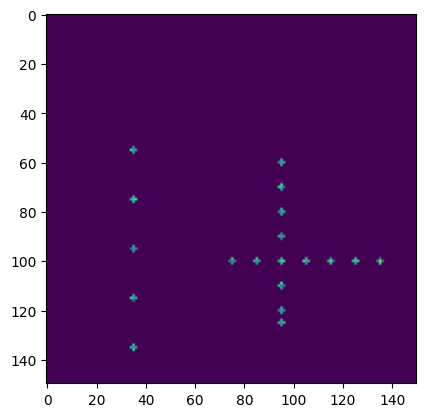

In [3]:
plt.imshow(test[0,:,:,test_phantom.matrix_dims[2]//2])
x = test_phantom.mask
print(np.sum(np.where(x != 3, 1, 0)))


In [4]:
num_transducers = 3
transducers = [transducer.Planewave(max_frequency=1e6,
                                    elements = 32, 
                                    width = 20e-3,
                                    height =  10e-3,
                                    sensor_sampling_scheme = 'not_centroid', 
                                    sweep = np.pi/6,
                                    ray_num = 30, 
                                    imaging_ndims = 2,
                                    focus_elevation = 50e-3,
                                    ) for i in range(num_transducers)]

for t in transducers:
    t.make_sensor_coords(test_phantom.baseline[0])

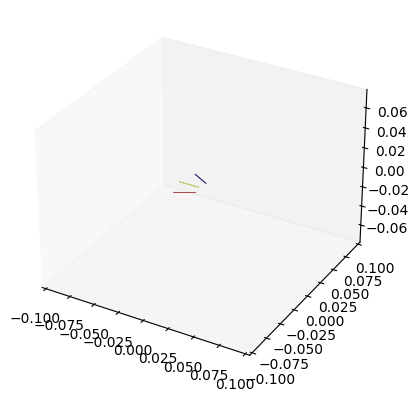

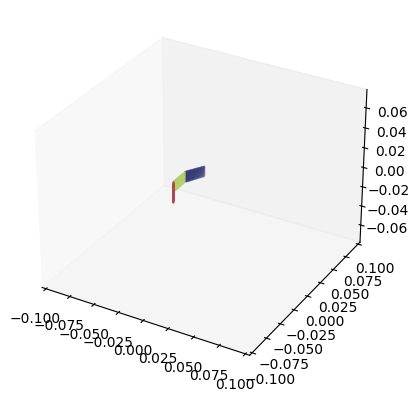

In [5]:
cont_transducer_set = transducer_set.TransducerSet(transducers, seed=8888)
cont_transducer_set.assign_pose(0, geometry.Transform([-np.pi/6,0,0], [-0.02,0.01866,0]))
cont_transducer_set.assign_pose(2, geometry.Transform([np.pi/6,0,0], [-0.02,-0.01866,0]))
cont_transducer_set.assign_pose(1, geometry.Transform(translation=[-0.025,0,0]))
# test_transducer_set.assign_pose(0, geometry.Transform([-2*np.pi/6,0,0], [0,0.01,0]))
# test_transducer_set.assign_pose(1, geometry.Transform([2*np.pi/6,0,0], [0,-0.01,0]))
# test_transducer_set.assign_pose(1, geometry.Transform([np.pi/20,0,0], [0,-0.01,0]))

cont_transducer_set.plot_transducer_fovs(scale=0.1)
cont_transducer_set.plot_transducer_coords(scale=0.1)

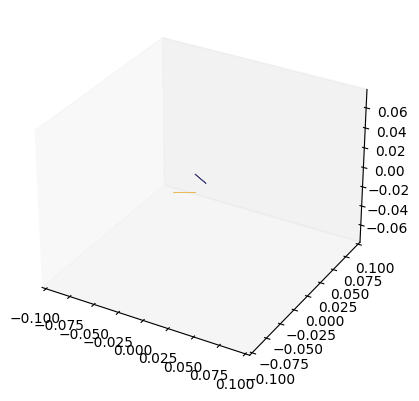

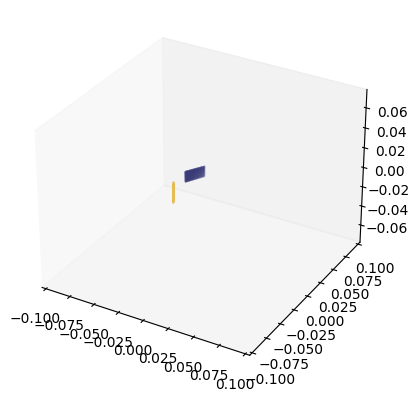

In [6]:
num_transducers = 2
transducers_copy = [transducer.Planewave(max_frequency=1e6,
                                    elements = 32, 
                                    width = 20e-3,
                                    height =  10e-3,
                                    sensor_sampling_scheme = 'not_centroid', 
                                    sweep = np.pi/6,
                                    ray_num = 30, 
                                    imaging_ndims = 2,
                                    focus_elevation = 50e-3,
                                    ) for i in range(num_transducers)]

for t in transducers_copy:
    t.make_sensor_coords(test_phantom.baseline[0])
gap_transducer_set = transducer_set.TransducerSet(transducers_copy, seed=8888)
gap_transducer_set.assign_pose(0, geometry.Transform([-np.pi/6,0,0], [-0.02,0.01866,0]))
gap_transducer_set.assign_pose(1, geometry.Transform([np.pi/6,0,0], [-0.02,-0.01866,0]))

gap_transducer_set.plot_transducer_fovs(scale=0.1)
gap_transducer_set.plot_transducer_coords(scale=0.1)



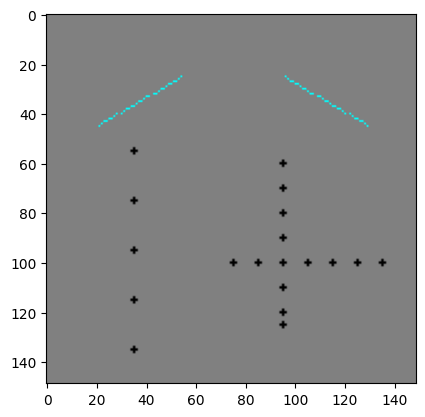

In [7]:
extended_sensor = sensor.Sensor(transducer_set=cont_transducer_set, aperture_type='extended_aperture')
tar_sensor = sensor.Sensor(transducer_set=cont_transducer_set, aperture_type='transmit_as_receive')
gap_sensor = sensor.Sensor(transducer_set=gap_transducer_set, aperture_type='extended_aperture')
gm = extended_sensor.visualize(test_phantom, index=[slice(0, -1, 1), slice(0, -1, 1), test_phantom.matrix_dims[2]//2])

gm2 = gap_sensor.visualize(test_phantom, index=[slice(0, -1, 1), slice(0, -1, 1), test_phantom.matrix_dims[2]//2])

In [8]:
simprops = simulation.SimProperties(
                grid_size       = (80e-3,80e-3,30e-3),
                voxel_size      = (0.5e-3,0.5e-3,0.5e-3),
                PML_size        = (16,8,8),
                PML_alpha       = 2,
                t_end           = 12e-5,           # [s]
                bona            = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff     = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power     = 1.5,
                grid_lambda     = 2,
                )

In [9]:
tar_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/psf_tar_aperture',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = cont_transducer_set,
                 sensor          = tar_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 2,
                 additional_keys = ['p_max']
                 )

extended_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/psf_extended_aperture',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = cont_transducer_set,
                 sensor          = extended_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 2,
                 additional_keys = ['p_max']
                 )

gap_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/psf_gap_experiment_ea',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = gap_transducer_set,
                 sensor          = gap_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 2,
                 additional_keys = ['p_max']
                 )

tar_experiment.save()
extended_experiment.save()
gap_experiment.save()

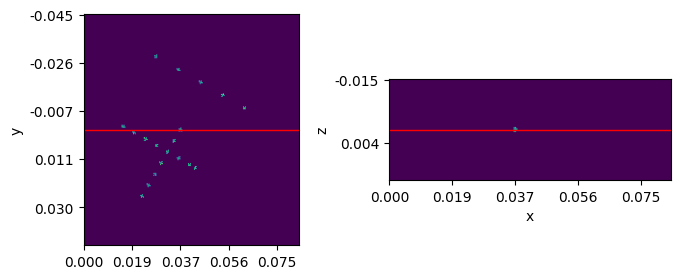

In [10]:
gap_experiment.plot_ray_path(0)

In [11]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_tar_aperture')
test_experiment.run(dry=True)
test_experiment.run(repeat=True)

dry run of simulation


100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

running with 2 workers



preparation for sim    0 completed in  5.32 seconds
preparation for sim    1 completed in  5.51 seconds
preparation for sim    2 completed in  5.59 seconds
simulation             0 completed in 11.24 seconds
preparation for sim    3 completed in  5.47 seconds
preparation for sim    4 completed in  5.58 seconds
simulation             1 completed in 10.99 seconds
preparation for sim    5 completed in  5.45 seconds
preparation for sim    6 completed in  5.51 seconds
simulation             2 completed in 10.95 seconds
preparation for sim    7 completed in  5.24 seconds
simulation             3 completed in 10.45 seconds
preparation for sim    8 completed in  5.43 seconds
simulation             4 completed in 11.59 seconds
preparation for sim    9 completed in  5.41 seconds
simulation             5 completed in 11.21 seconds
preparation for sim   10 completed in  5.29 seconds
simulation             6 completed in 10.89 seconds
preparation for sim   11 completed in  5.22 seconds
simulation  

In [12]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_extended_aperture')
test_experiment.run(dry=True)
test_experiment.run(repeat=True)

dry run of simulation


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

running with 2 workers



preparation for sim    0 completed in  4.75 seconds
preparation for sim    1 completed in  4.87 seconds
preparation for sim    2 completed in  4.96 seconds
simulation             0 completed in  9.49 seconds
preparation for sim    3 completed in  4.65 seconds
simulation             1 completed in  9.70 seconds
preparation for sim    4 completed in  7.03 seconds
preparation for sim    5 completed in  7.37 seconds
preparation for sim    6 completed in  5.12 seconds
simulation             2 completed in 17.15 seconds
preparation for sim    7 completed in  4.91 seconds


simulation             3 completed in  9.81 seconds
preparation for sim    8 completed in  4.99 seconds
simulation             4 completed in  9.46 seconds
preparation for sim    9 completed in  4.97 seconds
simulation             5 completed in  9.88 seconds
preparation for sim   10 completed in  4.95 seconds
simulation             6 completed in  9.90 seconds
preparation for sim   11 completed in  7.34 seconds
simulation             7 completed in 15.68 seconds
preparation for sim   12 completed in  4.98 seconds
simulation             8 completed in  9.62 seconds
preparation for sim   13 completed in  4.86 seconds
simulation             9 completed in  9.87 seconds
preparation for sim   14 completed in  4.97 seconds
simulation            10 completed in  9.78 seconds
preparation for sim   15 completed in  4.96 seconds
simulation            11 completed in 10.05 seconds
preparation for sim   16 completed in  5.37 seconds
simulation            12 completed in  9.87 seconds
preparation 

In [13]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_gap_experiment_ea')
test_experiment.run(dry=True)
test_experiment.run(repeat=True)

dry run of simulation


100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

running with 2 workers



preparation for sim    0 completed in  4.86 seconds
preparation for sim    1 completed in  5.01 seconds
preparation for sim    2 completed in  5.21 seconds
simulation             0 completed in 10.14 seconds
preparation for sim    3 completed in  4.74 seconds
preparation for sim    4 completed in  4.88 seconds
simulation             1 completed in  9.38 seconds
preparation for sim    5 completed in  4.70 seconds
preparation for sim    6 completed in  4.94 seconds
simulation             2 completed in  9.44 seconds
preparation for sim    7 completed in  4.97 seconds
simulation             3 completed in  9.56 seconds
preparation for sim    8 completed in  4.96 seconds
simulation             4 completed in 10.11 seconds
preparation for sim    9 completed in  4.92 seconds
simulation             5 completed in  9.45 seconds
preparation for sim   10 completed in  4.91 seconds
simulation             6 completed in  9.95 seconds
preparation for sim   11 completed in  4.89 seconds
simulation  

# Reconstruction

In [14]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_tar_aperture')
test_experiment.run(dry=True)
test_experiment.add_results()
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

dry run of simulation


100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


In [15]:
image1 = test_reconstruction.compound(workers=24, resolution_multiplier=2, local=True)

100%|██████████| 90/90 [00:00<00:00, 596346.54it/s]


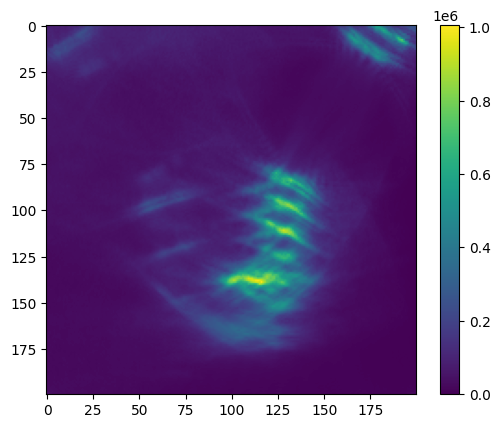

In [16]:
plt.imshow(image1[:,:,image1.shape[2]//2])
plt.colorbar()

In [17]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_extended_aperture')
test_experiment.run(dry=True)
test_experiment.add_results()
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

dry run of simulation


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


In [18]:
image2 = test_reconstruction.compound(workers=24, resolution_multiplier=2, local=True)

100%|██████████| 90/90 [00:00<00:00, 1031386.23it/s]


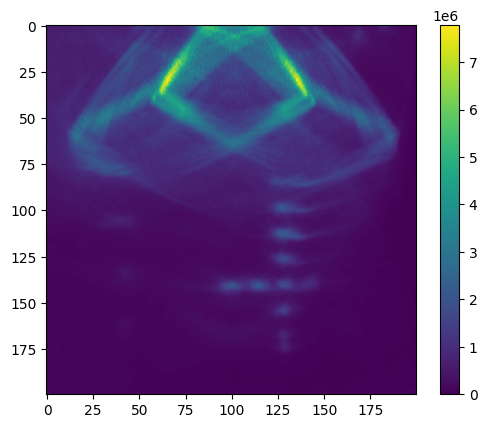

In [19]:
plt.imshow(image2[:,:,image2.shape[2]//2])
plt.colorbar()

In [20]:
test_experiment = experiment.Experiment.load('../experiment_files/psf_gap_experiment_ea')
test_experiment.run(dry=True)
test_experiment.add_results()
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

dry run of simulation


100%|██████████| 2/2 [00:00<00:00,  4.68it/s]


In [21]:
image3 = test_reconstruction.compound(workers=24, resolution_multiplier=2, local=True)

100%|██████████| 60/60 [00:00<00:00, 727335.95it/s]


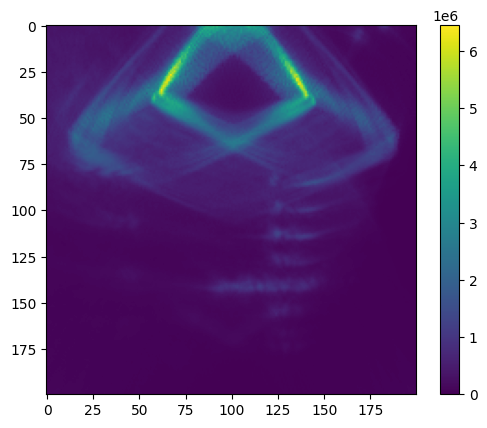

In [22]:
plt.imshow(image3[:,:,image3.shape[2]//2])
plt.colorbar()